# Beyond Recognition: Comparative Analysis of Human and AI-Generated Textual Annotations of Mid-Air Hand Gestures

This notebook presents a comprehensive statistical analysis evaluating the quality and effectiveness of hand gesture annotations generated by human annotators versus large language models (LLMs). The annotations consist of textual descriptions of mid-air hand gestures designed to facilitate hands-free interaction with unified communication platforms.

## Background and Context

Participants were instructed to perform specific hand gestures corresponding to eight common commands in Microsoft Teams. This gesture-based interaction paradigm enables seamless communication control in various contexts without requiring traditional input modalities. The experimental design focused on the following eight gesture-command mappings:

- **Volume Increase** (`c1_description`): Gesture to amplify audio output
- **Volume Decrease** (`c2_description`): Gesture to reduce audio output  
- **Microphone Mute** (`c3_description`): Gesture to disable audio input
- **Microphone Unmute** (`c4_description`): Gesture to enable audio input
- **Camera Deactivation** (`c5_description`): Gesture to disable video feed
- **Camera Activation** (`c6_description`): Gesture to enable video feed
- **Question Request** (`c7_description`): Gesture to signal intent to speak
- **Call Termination** (`c8_description`): Gesture to end the communication session

## Research Objectives

This analysis addresses two primary research questions:

1. **Semantic Quality Assessment**: To quantify the semantic similarity and descriptive quality of textual annotations across human and AI-generated sources
2. **Recognition Performance Evaluation**: To assess how effectively different annotation methodologies enable accurate gesture-to-command mapping in unified communication platform contexts

## Annotation Methodology and Dataset Composition

The experimental dataset comprises multiple annotation groups categorized by generation method and structural constraints. This multi-faceted approach enables comprehensive evaluation of annotation quality across different methodological paradigms.

### Human-Generated Annotations

Two distinct human annotation protocols were employed to establish baseline performance metrics:

**Human Structured Annotations**  
Expert-guided annotations produced by one HCI specialist and two trained human annotators following a standardized protocol. This group represents the gold standard for systematic, methodologically rigorous annotation practices.  
*Dataset*: [`d0_human_structured_descriptions.csv`](data/descriptions/d0_human_structured_descriptions.csv)

**Human Unstructured Annotations**  
Collaborative annotations generated by two trained annotators without predetermined structural constraints, representing naturalistic annotation behavior.  
*Dataset*: [`d6_human_non_structured_descriptions.csv`](data/descriptions/d6_human_non_structured_descriptions.csv)

### AI-Generated Annotations

Automated annotations were generated using state-of-the-art large language models, with image sequences extracted from recorded gesture performances serving as input modality. Each model was evaluated under both structured and unstructured annotation conditions:

**Structured AI Annotations**  
LLM-generated descriptions following the same systematic protocol as human structured annotations:

- **GPT-4o Structured**: OpenAI ChatGPT-4o with systematic annotation protocol  
  *Dataset*: [`d1_gpt-4o_structured_descriptions.csv`](data/descriptions/d1_gpt-4o_structured_descriptions.csv)

- **GPT-5 Structured**: OpenAI ChatGPT-5 with systematic annotation protocol  
  *Dataset*: [`d2_gpt-5_structured_descriptions.csv`](data/descriptions/d2_gpt-5_structured_descriptions.csv)

- **Gemini Structured**: Google Gemini 2.0 Flash with systematic annotation protocol  
  *Dataset*: [`d3_gemini_structured_descriptions.csv`](data/descriptions/d3_gemini_structured_descriptions.csv)

- **Claude Structured**: Anthropic Claude 3.7 Sonnet with systematic annotation protocol  
  *Dataset*: [`d4_sonnet_structured_descriptions.csv`](data/descriptions/d4_sonnet_structured_descriptions.csv)

- **Grok Structured**: xAI Grok 4 with systematic annotation protocol  
  *Dataset*: [`d5_grok_structured_descriptions.csv`](data/descriptions/d5_grok_structured_descriptions.csv)

**Unstructured AI Annotations**  
LLM-generated descriptions without predetermined structural constraints, mirroring naturalistic annotation conditions:

- **GPT-4o Unstructured**: OpenAI ChatGPT-4o without systematic protocol  
  *Dataset*: [`d7_gpt-4o_non_structured_descriptions.csv`](data/descriptions/d7_gpt-4o_non_structured_descriptions.csv)

- **GPT-5 Unstructured**: OpenAI ChatGPT-5 without systematic protocol  
  *Dataset*: [`d8_gpt-5_non_structured_descriptions.csv`](data/descriptions/d8_gpt-5_non_structured_descriptions.csv)

- **Gemini Unstructured**: Google Gemini 2.0 Flash without systematic protocol  
  *Dataset*: [`d9_gemini_non_structured_descriptions.csv`](data/descriptions/d9_gemini_non_structured_descriptions.csv)

- **Claude Unstructured**: Anthropic Claude 3.7 Sonnet without systematic protocol  
  *Dataset*: [`d10_sonnet_non_structured_descriptions.csv`](data/descriptions/d10_sonnet_non_structured_descriptions.csv)

- **Grok Unstructured**: xAI Grok 4 without systematic protocol  
  *Dataset*: [`d11_grok_non_structured_descriptions.csv`](data/descriptions/d11_grok_non_structured_descriptions.csv)

## Computational Environment and Library Configuration

This section establishes the computational framework required for statistical analysis and publication-quality visualization. The environment configuration ensures reproducible results and adherence to scientific publishing standards.

### Library Dependencies

**Data Processing and Analysis:**
- `pandas` and `numpy`: Core data manipulation and numerical computation libraries
- `bert_score`: Advanced semantic similarity computation using BERT embeddings
- `scipy` and `statsmodels`: Statistical hypothesis testing and advanced statistical modeling frameworks

**Visualization and Graphics:**
- `matplotlib` and `seaborn`: Scientific plotting libraries configured for publication-quality output
- LaTeX integration enabled for mathematical notation and professional typography

### Publication-Ready Configuration

The visualization environment is configured with the following specifications:
- **Font System**: Computer Modern Roman (cmr10) serif typeface for consistency with academic publications
- **LaTeX Rendering**: Enabled for mathematical expressions and scientific notation (`text.usetex = True`)
- **Graphics Backend**: PDF-compatible output for high-resolution figure generation
- **Typography**: Mathematical notation rendering with proper formatting for statistical symbols

This configuration ensures all generated visualizations meet the technical requirements for peer-reviewed scientific publications while maintaining consistent formatting throughout the analysis pipeline.

In [1]:
# Import necessary libraries.
from enum import Enum
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bert_score import score
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.proportion import proportions_ztest


# Set the style of the plots.
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family" : "serif",
    "font.size": 22,
    "font.serif":  "cmr10",
    "text.usetex": True,
    "pgf.rcfonts": False,
})
plt.rcParams["axes.formatter.use_mathtext"] = True

## Data Structure Definition and Taxonomic Classification

This section establishes the formal data structures and taxonomic classifications used throughout the analysis. Implementation of enumerated types ensures type safety, eliminates ambiguity in data references, and facilitates systematic analysis of gesture-annotation relationships.

### Enumerated Type Definitions

**Gesture Classification (`Gesture` Enum)**  
Defines the complete set of gesture commands evaluated in this study. Each enumerated value corresponds to a specific communication platform action, enabling systematic analysis across all experimental conditions.

**Annotation Group Classification (`Group` Enum)**  
Categorizes annotation sources according to generation methodology (human vs. AI) and structural constraints (structured vs. unstructured protocols). This classification enables comparative analysis across different annotation paradigms.

### Human-Readable Mapping Systems

To facilitate interpretation and presentation of results, two mapping dictionaries provide translation between internal identifiers and descriptive labels:

**Gesture Command Mapping (`GESTURES_MAP`)**  
Translates enumerated gesture identifiers to descriptive action labels (e.g., `Gesture.C1_COMMAND` → "Increase volume"). This mapping ensures consistent terminology across analysis outputs and visualizations.

**Annotation Group Mapping (`GROUPS_MAP`)**  
Converts group identifiers to concise, interpretable labels (e.g., `Group.HUMAN_STRUCTURED` → "Human-STR"). This standardization facilitates clear presentation of comparative results across annotation methodologies.

### Methodological Advantages

The implementation of enumerated types and structured mappings provides several analytical benefits:
- **Type Safety**: Eliminates runtime errors associated with string-based identifiers
- **Consistency**: Ensures uniform terminology across all analysis components
- **Maintainability**: Centralizes identifier management for systematic updates
- **Interpretability**: Enables automatic generation of publication-ready labels for figures and tables

In [2]:
class Gesture(Enum):
    """Enum class to represent the different hand gestures."""
    C1_COMMAND = "c1_command"
    C2_COMMAND = "c2_command"
    C3_COMMAND = "c3_command"
    C4_COMMAND = "c4_command"
    C5_COMMAND = "c5_command"
    C6_COMMAND = "c6_command"
    C7_COMMAND = "c7_command"
    C8_COMMAND = "c8_command"

class Group(Enum):
    """Enum class to represent the different description groups."""
    HUMAN_STRUCTURED = "d0_human_structured"
    GPT4O_STRUCTURED = "d1_gpt-4o_structured"
    GPT5_STRUCTURED = "d2_gpt-5_structured"
    GEMINI_STRUCTURED = "d3_gemini_structured"
    SONNET_STRUCTURED = "d4_sonnet_structured"
    GROK_STRUCTURED = "d5_grok_structured"
    HUMAN_NON_STRUCTURED = "d6_human_non_structured"
    GPT4O_NON_STRUCTURED = "d7_gpt-4o_non_structured"
    GPT5_NON_STRUCTURED = "d8_gpt-5_non_structured"
    GEMINI_NON_STRUCTURED = "d9_gemini_non_structured"
    SONNET_NON_STRUCTURED = "d10_sonnet_non_structured"
    GROK_NON_STRUCTURED = "d11_grok_non_structured"

# Mappings for better readability.
GESTURES_MAP: Dict[Gesture, str] = {
    Gesture.C1_COMMAND: "Increase volume",
    Gesture.C2_COMMAND: "Decrease volume",
    Gesture.C3_COMMAND: "Mute microphone",
    Gesture.C4_COMMAND: "Unmute microphone",
    Gesture.C5_COMMAND: "Turn off camera",
    Gesture.C6_COMMAND: "Turn on camera",
    Gesture.C7_COMMAND: "Ask for a question",
    Gesture.C8_COMMAND: "End call",
}

GROUPS_MAP: Dict[Group, str] = {
    Group.HUMAN_STRUCTURED: "Human-STR",
    Group.GPT4O_STRUCTURED: "GPT4o-STR",
    Group.GPT5_STRUCTURED: "GPT5-STR",
    Group.GEMINI_STRUCTURED: "Gemini-STR",
    Group.SONNET_STRUCTURED: "Sonnet-STR",
    Group.GROK_STRUCTURED: "Grok-STR",
    Group.HUMAN_NON_STRUCTURED: "Human-NSTR",
    Group.GPT4O_NON_STRUCTURED: "GPT4o-NSTR",
    Group.GPT5_NON_STRUCTURED: "GPT5-NSTR",
    Group.GEMINI_NON_STRUCTURED: "Gemini-NSTR",
    Group.SONNET_NON_STRUCTURED: "Sonnet-NSTR",
    Group.GROK_NON_STRUCTURED: "Grok-NSTR",
}

## Dataset Import and Preprocessing Pipeline

This section implements the data ingestion and preprocessing workflow necessary for comparative analysis across annotation groups. The preprocessing pipeline ensures data consistency and compatibility for subsequent statistical analysis.

### Data Import Protocol

**Multi-Source Dataset Integration**  
A systematic import process loads annotation datasets from all experimental groups, with file paths dynamically constructed using the `Group` enumeration to ensure consistency and prevent manual errors. Each dataset is stored in a dictionary structure keyed by group identifier for efficient access during analysis.

### Data Standardization Procedures

**Sample Size Normalization**  
All datasets are standardized to match the sample size of the human structured annotation group, which serves as the reference standard. This normalization ensures balanced comparisons across groups and eliminates potential biases introduced by varying sample sizes.

**Data Structure Transformation**  
Each dataset undergoes restructuring using the `melt` operation to convert from wide-format (multiple description columns) to long-format representation:
- **Identifier Preservation**: `id_video` column maintained as primary key for participant linking
- **Variable Transformation**: Original column names converted to `id_description` variable
- **Value Extraction**: Description content extracted to standardized `description` variable

### Quality Assurance

This preprocessing approach ensures:
- **Uniform Structure**: All datasets conform to identical schema for cross-group analysis
- **Consistent Indexing**: Standardized identifiers enable reliable data linking across experimental conditions
- **Statistical Validity**: Balanced sample sizes support robust statistical comparison methodologies

The resulting preprocessed datasets provide a standardized foundation for subsequent semantic similarity analysis and recognition accuracy evaluation.

In [3]:
# Create a dictionary of datasets.
datasets = {
    group: pd.read_csv(
        f"./data/descriptions/{group.value}_descriptions.csv"
    ) for group in Group
}

# Ensure all datasets have the same size and clean the columns.
size = datasets[Group.HUMAN_STRUCTURED].shape[0]
for value, df in datasets.items():
    datasets[value] = df.iloc[:size].melt(
        id_vars="id_video", var_name="id_description", value_name="description"
    )

## Evaluation Metrics and Computational Methods

This section defines the core computational functions for quantitative evaluation of annotation quality and recognition performance. These metrics provide the foundation for statistical analysis and comparative assessment across annotation methodologies.

### Semantic Similarity Assessment

**BERTScore Computation (`compute_bert_score`)**  
Implements contextualized semantic similarity measurement using transformer-based language models. This function leverages the BERTScore framework to compute precision-based similarity between candidate and reference descriptions.

*Parameters:*
- `candidate_descriptions`: Target descriptions for evaluation
- `reference_descriptions`: Gold standard descriptions for comparison  
- `model_type`: Pre-trained transformer model specification (default: `microsoft/deberta-xlarge-mnli`)

*Returns:*
- Precision scores quantifying semantic alignment between description pairs

*Methodological Foundation:*  
BERTScore utilizes contextual embeddings to capture semantic relationships beyond surface-level text similarity, providing robust evaluation of annotation quality that accounts for paraphrasing and semantic equivalence.

### Recognition Accuracy Quantification

**Classification Accuracy Calculation (`calculate_accuracy`)**  
Computes recognition performance metrics by comparing predicted gesture commands against ground truth labels. This function provides essential performance indicators for evaluating annotation effectiveness in gesture recognition contexts.

*Parameters:*
- `predictions`: Predicted gesture command assignments
- `ground_truth`: Verified correct command labels

*Returns:*
- **Accuracy Rate**: Proportion of correct predictions relative to total samples
- **Correct Count**: Absolute number of accurate predictions
- **Incorrect Count**: Absolute number of classification errors

*Statistical Properties:*  
The accuracy metric provides an unbiased estimator of classification performance, enabling direct comparison of recognition effectiveness across different annotation methodologies. The function implements element-wise comparison to ensure precise evaluation of prediction quality.

In [4]:
def compute_bert_score(
        candidate_descriptions: List, reference_descriptions: List,
        model_type: str = "microsoft/deberta-xlarge-mnli"
) -> List:
    """
    Compute BERTScore for comparing descriptions.

    Args:
        candidate_descriptions (List): Descriptions to be evaluated.
        reference_descriptions (List): Ground-truth descriptions.
        model_type (str): The pre-trained BERT model to use.

    Returns:
        List: The precision scores for each description pair.
    """
    precision, _, _ = score(
        candidate_descriptions, reference_descriptions,
        model_type=model_type, lang="en"
    )

    return precision.tolist()


def calculate_accuracy(
        predictions: pd.Series, ground_truth: pd.Series
    ) -> Tuple[float, int, int]:
    """Function to calculate accuracy.

    Args:
        predictions (pd.Series): The list of predicted commands.
        ground_truth (pd.Series): The list of ground truth commands.

    Returns:
        Tuple[float, int, int]: A tuple containing the accuracy, the number of
            correct predictions, and the number of incorrect predictions.
    """
    correct = (predictions == ground_truth).sum()
    incorrect = len(ground_truth) - correct
    total = len(ground_truth)
    return correct / total, correct, incorrect

## Semantic Similarity Analysis Across Annotation Groups

This section implements a comprehensive semantic similarity analysis to evaluate the alignment between different annotation methodologies and the established gold standard. The analysis employs state-of-the-art transformer-based semantic embeddings to quantify annotation quality.

### Analytical Framework

**Reference Standard Establishment**  
The human-based annotation groups serve as the gold standard for semantic similarity evaluation, representing expert-guided, systematically generated descriptions that provide the benchmark for annotation quality assessment.

**Comparative Similarity Computation**  
For each experimental group, semantic similarity is computed using the following methodology:

1. **Data Validation**: Non-missing descriptions are identified and validated across both comparison and reference datasets
2. **Embedding Generation**: Transformer-based models generate contextual embeddings for all valid description pairs
3. **Similarity Quantification**: BERTScore precision metrics quantify semantic alignment between target and reference descriptions

### Technical Implementation

**Model Specification**  
The analysis employs the `microsoft/deberta-xlarge-mnli` transformer model, which provides robust contextualized embeddings optimized for natural language inference tasks. This model choice ensures high-quality semantic representations suitable for cross-group comparison.

**Quality Assurance Protocol**  
- **Missing Data Handling**: Only descriptions with valid content are included in similarity calculations
- **Index Alignment**: Careful indexing ensures accurate pairing between comparison and reference descriptions
- **Batch Processing**: Efficient computation of similarity scores across all annotation groups

### Output Structure

Results are systematically organized in a structured format containing:
- **Group Identifier**: Annotation methodology classification
- **Similarity Scores**: Distribution of semantic similarity values for each group
- **Statistical Metadata**: Supporting information for subsequent statistical analysis

This framework enables robust quantitative comparison of annotation quality across human and AI-generated description methodologies, providing empirical evidence for the relative effectiveness of different annotation approaches.

In [5]:
# Initialize the similarity results.
similarity_results = {
    Group.HUMAN_STRUCTURED: [],
    Group.HUMAN_NON_STRUCTURED: []
}

# Calculate similarity scores for each dataset.
for group, df_group in datasets.items():
    if group == Group.HUMAN_STRUCTURED:
        gold_group = group
        indexes_0 = df_group.description.notna()
        df_gold_standard = df_group
        continue

    if group == Group.HUMAN_NON_STRUCTURED:
        gold_group = group
        indexes_0 = df_group.description.notna()
        df_gold_standard = df_group
        continue

    # Get the valid indexes of the current dataset.
    indexes_1 = df_group.description.notna()

    # Calculate similarity scores.
    similarity = compute_bert_score(
        df_group[indexes_0 & indexes_1].description.to_list(),
        df_gold_standard[indexes_0 & indexes_1].description.to_list()
    )

    # Append the results to the similarity results list.
    similarity_results[gold_group].append({
        "Group": group,
        "Similarity": similarity
    })

## Analysis of Variance: Inter-Group Similarity Differences

This section employs Analysis of Variance (ANOVA) to assess whether semantic similarity scores exhibit statistically significant differences across annotation groups. The ANOVA framework provides a robust statistical foundation for evaluating the null hypothesis of equal group means.

### Statistical Methodology

**Hypothesis Formulation**
- **Null Hypothesis (H₀)**: Mean semantic similarity scores are equal across all annotation groups
- **Alternative Hypothesis (H₁)**: At least one group exhibits significantly different mean semantic similarity scores

**ANOVA Implementation**  
The one-way ANOVA test evaluates variance partitioning between and within annotation groups:
- **Between-Group Variance**: Measures systematic differences in similarity scores across annotation methodologies
- **Within-Group Variance**: Quantifies random variation in similarity scores within each annotation group
- **F-Statistic**: Ratio of between-group to within-group variance, testing the significance of group differences

### Statistical Interpretation

**F-Statistic**  
The F-statistic quantifies the magnitude of group differences relative to random variation. Larger F-values indicate greater systematic differences between annotation groups.

**P-Value Assessment**  
The p-value represents the probability of observing the calculated F-statistic under the null hypothesis of no group differences. Conventional significance thresholds (α = 0.05) are applied to determine statistical significance.

### Result Documentation

ANOVA results are systematically documented and exported for reproducibility:
- **Test Statistics**: F-statistic and associated p-value
- **Effect Size**: Quantitative measure of group difference magnitude  
- **Export Format**: CSV file format for integration with manuscript preparation workflows

This analysis provides the statistical foundation for determining whether observed differences in annotation quality represent meaningful systematic effects rather than random variation, informing subsequent post-hoc analyses and interpretation of results.

In [6]:
# Initialize the similarity results.
df_similarity_results = {
    Group.HUMAN_STRUCTURED: None,
    Group.HUMAN_NON_STRUCTURED: None
}

for i, (group, similarity_result) in enumerate(similarity_results.items()):
    df_similarity_results[group] = pd.DataFrame(similarity_result)

    # Perform ANOVA.
    anova_result = f_oneway(*[
        values for values in df_similarity_results[group].Similarity
    ])
    print("ANOVA Results:", anova_result)

    # Save the ANOVA results.
    df_anova_results = pd.DataFrame({
        "Test": [ "ANOVA" ],
        "F-statistic": [ anova_result.statistic ],
        "p-value": [ anova_result.pvalue ]
    })
    df_anova_results.to_csv(
        f"outputs/r{i}_similarity_anova_results.csv", index=False)

ANOVA Results: F_onewayResult(statistic=np.float64(182.4502927123165), pvalue=np.float64(7.877383376735098e-144))
ANOVA Results: F_onewayResult(statistic=np.float64(216.59968948504633), pvalue=np.float64(9.332895055822534e-169))


## Post-Hoc Multiple Comparisons: Tukey's Honest Significant Difference Test

Following significant ANOVA results, post-hoc analysis using Tukey's Honest Significant Difference (HSD) test identifies specific pairwise group differences while controlling for family-wise error rate. This approach ensures statistical rigor when making multiple comparisons across annotation groups.

### Methodological Framework

**Multiple Comparison Problem**  
When comparing multiple groups simultaneously, the probability of Type I error (false positive) increases with the number of comparisons. Tukey's HSD test addresses this issue by maintaining the overall significance level across all pairwise comparisons.

**Statistical Procedure**
1. **Data Transformation**: Similarity score arrays are expanded to individual observations for proper statistical modeling
2. **Pairwise Testing**: All possible group pairs are systematically evaluated for significant differences
3. **Error Rate Control**: Family-wise error rate maintained at α = 0.001 to ensure conservative hypothesis testing

### Test Implementation

**Tukey's HSD Algorithm**  
The test employs the studentized range distribution to determine critical values for pairwise mean differences, accounting for:
- **Sample Size Variations**: Unequal group sizes appropriately weighted in significance calculations
- **Pooled Variance**: Combined estimate of within-group variance across all experimental conditions
- **Multiple Testing Adjustment**: Simultaneous confidence intervals for all pairwise comparisons

**Output Interpretation**
- **Mean Differences**: Quantitative assessment of semantic similarity differences between group pairs
- **Confidence Intervals**: Statistical ranges for population-level difference estimates
- **Adjusted P-Values**: Significance levels corrected for multiple testing

### Result Organization and Export

**Data Processing Pipeline**
- **Group Identifier Mapping**: Internal codes converted to human-readable labels for interpretation
- **Statistical Summary**: Comprehensive tabulation of all pairwise comparison results
- **Export Documentation**: Results saved in structured CSV format for manuscript integration

This post-hoc analysis provides detailed insights into the specific annotation methodologies that exhibit significant performance differences, enabling targeted interpretation of semantic similarity patterns and informing evidence-based conclusions about annotation quality across experimental conditions.

In [7]:
for i, group in enumerate(df_similarity_results, 2):

    # Explode the similarity results.
    df_similarity_results[group] = df_similarity_results[group].explode(
        "Similarity", ignore_index=True)

    # Perform Tukey's HSD post-hoc test.
    tukey = pairwise_tukeyhsd(
        endog=df_similarity_results[group].Similarity.values.tolist(),
        groups=[ g.value for g in df_similarity_results[group].Group ],
        alpha=0.001
    )

    # Generate the post-hoc summary.
    posthoc_summary = tukey.summary()

    # Convert the posthoc_summary to a DataFrame.
    df_posthoc = pd.DataFrame(
        data=tukey.summary().data[1:], columns=tukey.summary().data[0]
    )

    # Rename the groups for better readability.
    for column in df_posthoc.columns[:2]:
        df_posthoc[column] = df_posthoc[column].map({
            g.value: GROUPS_MAP[g] for g in Group
        })

    # Print the post-hoc summary.
    print("Tukey's HSD Results:")
    print(df_posthoc)

    # Save Tukey's HSD results.
    df_posthoc.to_csv(
        f"outputs/r{i}_similarity_tukey_hsd_results.csv", index=False)

Tukey's HSD Results:
       group1      group2  meandiff   p-adj   lower   upper  reject
0   GPT4o-STR    GPT5-STR   -0.0293  0.0000 -0.0477 -0.0109    True
1   GPT4o-STR  Gemini-STR    0.0372  0.0000  0.0190  0.0554    True
2   GPT4o-STR  Sonnet-STR    0.0151  0.0111 -0.0031  0.0333   False
3   GPT4o-STR    Grok-STR   -0.0785  0.0000 -0.0967 -0.0604    True
4    GPT5-STR  Gemini-STR    0.0665  0.0000  0.0481  0.0849    True
5    GPT5-STR  Sonnet-STR    0.0444  0.0000  0.0260  0.0628    True
6    GPT5-STR    Grok-STR   -0.0492  0.0000 -0.0676 -0.0308    True
7  Gemini-STR  Sonnet-STR   -0.0221  0.0000 -0.0403 -0.0039    True
8  Gemini-STR    Grok-STR   -0.1158  0.0000 -0.1339 -0.0976    True
9  Sonnet-STR    Grok-STR   -0.0937  0.0000 -0.1118 -0.0755    True
Tukey's HSD Results:
        group1       group2  meandiff   p-adj   lower   upper  reject
0  Sonnet-NSTR    Grok-NSTR   -0.0589  0.0000 -0.0709 -0.0468    True
1  Sonnet-NSTR   GPT4o-NSTR   -0.0054  0.4021 -0.0175  0.0066   False


## Statistical Summary and Confidence Interval Estimation

This section computes descriptive statistics and confidence intervals for semantic similarity scores across annotation groups, providing comprehensive statistical characterization of group performance and uncertainty quantification.

### Descriptive Statistical Analysis

**Central Tendency and Variability Measures**  
For each annotation group, the following statistical parameters are computed:
- **Mean (μ)**: Expected value of semantic similarity scores, representing average annotation quality
- **Median**: Robust central tendency measure less sensitive to outliers
- **Standard Deviation (σ)**: Population-level variability in annotation quality
- **Sample Count (n)**: Number of valid observations per group

**Group Ranking and Comparison**  
Results are systematically ordered by mean semantic similarity scores to facilitate interpretive ranking of annotation methodologies from lowest to highest performance.

### Confidence Interval Construction

**Standard Error Calculation**  
The standard error of the mean is computed as:
$$SE = \frac{\sigma}{\sqrt{n}}$$
where σ represents the sample standard deviation and n denotes the sample size.

**Confidence Level Selection**  
A 99.9% confidence level (α = 0.001) is employed using the critical value z₀.₀₀₀₅ = 3.291, providing highly conservative estimates of population parameter uncertainty.

**Interval Bounds Computation**  
The confidence interval boundaries are calculated as:
$$CI_{lower} = \mu - z_{\alpha/2} \times SE$$
$$CI_{upper} = \mu + z_{\alpha/2} \times SE$$

### Statistical Interpretation

**Population Parameter Estimation**  
Confidence intervals provide plausible ranges for true population means of semantic similarity scores, accounting for sampling variability and enabling robust inference about annotation quality differences.

**Uncertainty Quantification**  
Interval width reflects the precision of mean estimates, with narrower intervals indicating more reliable group performance assessments.

### Documentation and Export

Statistical summaries are systematically documented and exported in standardized CSV format, facilitating integration with manuscript preparation workflows and ensuring reproducible reporting of analytical results. The structured output includes all computed statistics and confidence intervals for comprehensive performance evaluation across annotation methodologies.

In [8]:
# Initialize the similarity stats results.
similarity_stats_results = {
    Group.HUMAN_STRUCTURED: None,
    Group.HUMAN_NON_STRUCTURED: None
}

for i, group in enumerate(df_similarity_results, 4):

    # Rename the groups for better readability.
    df_similarity_results[group].Group = \
        df_similarity_results[group].Group.map({
            g: GROUPS_MAP[g] for g in Group
        })

    # Manually calculate the confidence intervals for the similarity
    # differences, because we can order the Tukey's HSD results by group's
    # similarity.
    similarity_stats_results[group] = \
        df_similarity_results[group].groupby("Group")["Similarity"].agg(
            Mean="mean", Median="median", Count="count", STD="std"
        ).reset_index()

    # Sort the DataFrame by mean in ascending order.
    similarity_stats_results[group] = \
        similarity_stats_results[group].sort_values(
            by="Mean", ascending=True
        ).reset_index(drop=True)

    # Calculate the standard error.
    similarity_stats_results[group]["SE"] = \
        similarity_stats_results[group]["STD"] / np.sqrt(
            similarity_stats_results[group]["Count"]
        )

    # Calculate the 99.9% confidence interval.
    ci = 3.291  # For 99.9% CI.
    # ci = 2.576  # For 99% CI.
    # ci = 1.960  # For 95% CI.
    # ci = 1.645  # For 90% CI.
    similarity_stats_results[group]["Lower"] = \
        similarity_stats_results[group]["Mean"] - (
            ci * similarity_stats_results[group]["SE"]
        )
    similarity_stats_results[group]["Upper"] = \
        similarity_stats_results[group]["Mean"] + (
            ci * similarity_stats_results[group]["SE"]
        )

    # Save the similarity results statistics.
    similarity_stats_results[group].to_csv(
        f"outputs/r{i}_similarity_stats_results.csv", index=False)

## Visualization: Mean Semantic Similarity with Confidence Intervals

This section generates a publication-quality visualization displaying mean semantic similarity scores and their associated confidence intervals across annotation groups. The visualization facilitates intuitive interpretation of statistical differences while maintaining scientific rigor.

### Graphical Design Principles

**Data Representation Strategy**  
The scatter plot employs a horizontal orientation to accommodate group label readability:
- **X-axis**: Semantic similarity scores (continuous scale from 0 to 1)
- **Y-axis**: Annotation group identifiers (categorical, ordered by performance)
- **Point Markers**: Mean similarity scores represented by filled circles
- **Error Bars**: Horizontal lines indicating 99.9% confidence intervals

**Visual Hierarchy and Clarity**  
- **Monochromatic Color Scheme**: Black markers and error bars ensure high contrast and print compatibility
- **Grid Integration**: Dashed grid lines with reduced opacity facilitate value reading without visual interference
- **Typography**: LaTeX-rendered labels ensure mathematical notation consistency

### Statistical Information Display

**Point Estimates**  
Each data point represents the sample mean semantic similarity score for its corresponding annotation group, providing a summary measure of central tendency.

**Uncertainty Visualization**  
Horizontal error bars extend from the lower to upper confidence interval bounds, visually representing the range of plausible population mean values. Error bar length reflects estimation precision, with shorter bars indicating more reliable mean estimates.

**Comparative Assessment**  
The ordered arrangement of groups enables direct visual comparison of annotation quality, with non-overlapping confidence intervals suggesting statistically significant differences between groups.

### Export Specifications

**Publication Format**  
The visualization is exported in PGF (Portable Graphics Format) for seamless integration with LaTeX document preparation systems, ensuring:
- **Vector Graphics**: Scalable output maintaining quality at any resolution
- **Font Consistency**: LaTeX typography matching manuscript formatting
- **Mathematical Notation**: Proper rendering of statistical symbols and expressions

This visualization provides an accessible yet rigorous representation of semantic similarity analysis results, supporting evidence-based interpretation of annotation quality differences across experimental conditions.

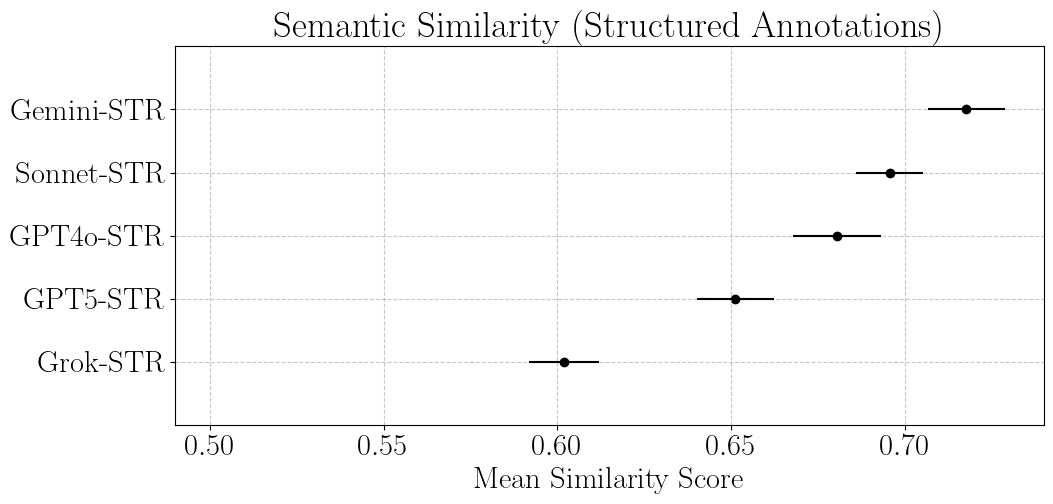

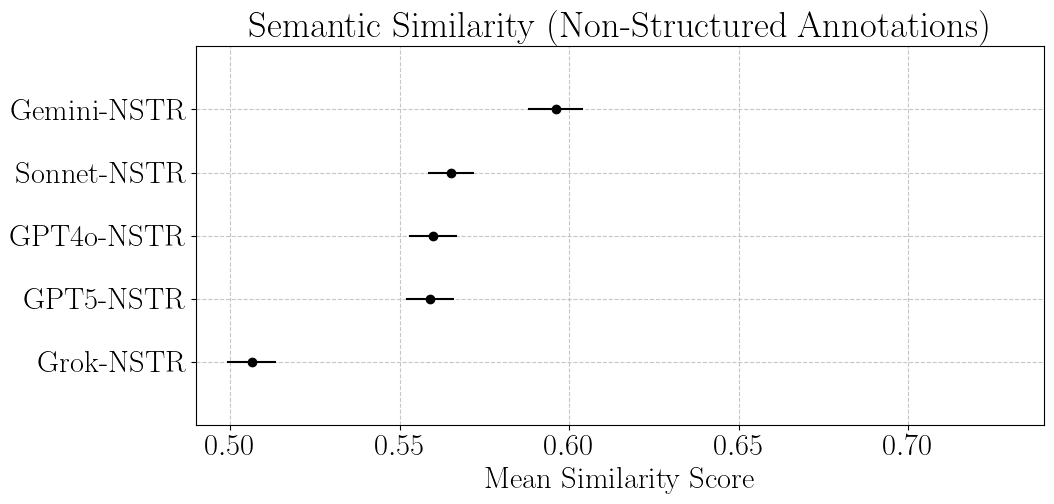

In [9]:
for i, similarity_stats_result in enumerate(similarity_stats_results.values()):

    # Plot the results.
    plt.figure(figsize=(11, 5.5))
    plt.scatter(
        similarity_stats_result["Mean"],
        similarity_stats_result["Group"],
        color="black"
    )

    # Plot vertical lines for confidence intervals.
    for _, row in similarity_stats_result.iterrows():
        plt.hlines(
            y=row["Group"], xmin=row["Lower"], xmax=row["Upper"], color="black"
        )

    # Add plot labels.
    title = "Semantic Similarity (Structured Annotations)" \
        if i == 0 else "Semantic Similarity (Non-Structured Annotations)"
    plt.title(title)
    plt.xlabel("Mean Similarity Score")
    plt.xlim(0.49, 0.74)
    plt.ylim(-1, len(similarity_stats_result))
    #plt.yticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot as a PGF file.
    plt.savefig(f"pgf/f{i}_semantic_similarity_scatter_plot.pgf")

## Distribution Analysis: Semantic Similarity Score Variability

This section presents a comprehensive distributional analysis of semantic similarity scores using box plots to visualize central tendency, variability, and potential outliers across annotation groups. The visualization reveals detailed patterns in annotation quality beyond simple mean comparisons.

### Box Plot Methodology

**Statistical Components**  
Each box plot displays five key distributional statistics:
- **Median (Q₂)**: Central line indicating the 50th percentile of similarity scores
- **Interquartile Range (IQR)**: Box boundaries representing Q₁ (25th) and Q₃ (75th) percentiles
- **Whiskers**: Extensions indicating variability beyond the central quartiles (typically 1.5 × IQR)
- **Outliers**: Individual points representing observations beyond whisker boundaries

**Distributional Information**  
Box plots provide comprehensive characterization of score distributions:
- **Central Tendency**: Median position within each group
- **Spread**: Box width indicating interquartile variability
- **Skewness**: Asymmetric box and whisker positioning revealing distributional shape
- **Extreme Values**: Outlier identification for quality assessment

### Visual Design and Interpretation

**Aesthetic Configuration**  
- **Color Palette**: Grayscale gradient ensuring print compatibility and professional appearance
- **Group Distinction**: Individual color mapping for each annotation methodology
- **Axis Orientation**: Categorical x-axis with rotated labels for readability
- **Statistical Clarity**: Box plot elements clearly delineated with appropriate line weights

**Comparative Analysis Framework**  
The side-by-side arrangement enables direct comparison of:
- **Median Differences**: Central tendency variations across groups
- **Variability Patterns**: Consistency of annotation quality within groups
- **Outlier Prevalence**: Frequency of extreme similarity scores
- **Distributional Shape**: Symmetry and skewness characteristics

### Methodological Advantages

**Robust Statistical Visualization**  
Box plots provide distribution-free summary statistics that remain valid regardless of underlying distributional assumptions, offering reliable characterization of annotation quality patterns.

**Outlier Detection and Analysis**  
Systematic identification of extreme similarity scores enables investigation of annotation edge cases and quality control assessment.

### Export and Documentation

The visualization is exported in publication-ready PGF format, ensuring seamless integration with LaTeX manuscript preparation while maintaining vector graphics quality and typographical consistency with scientific publishing standards.

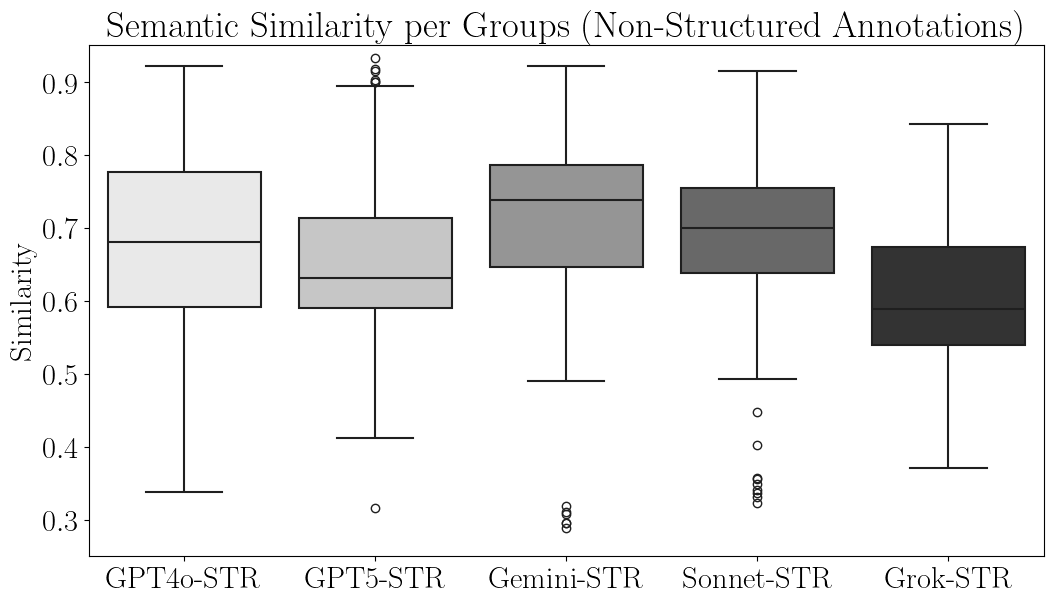

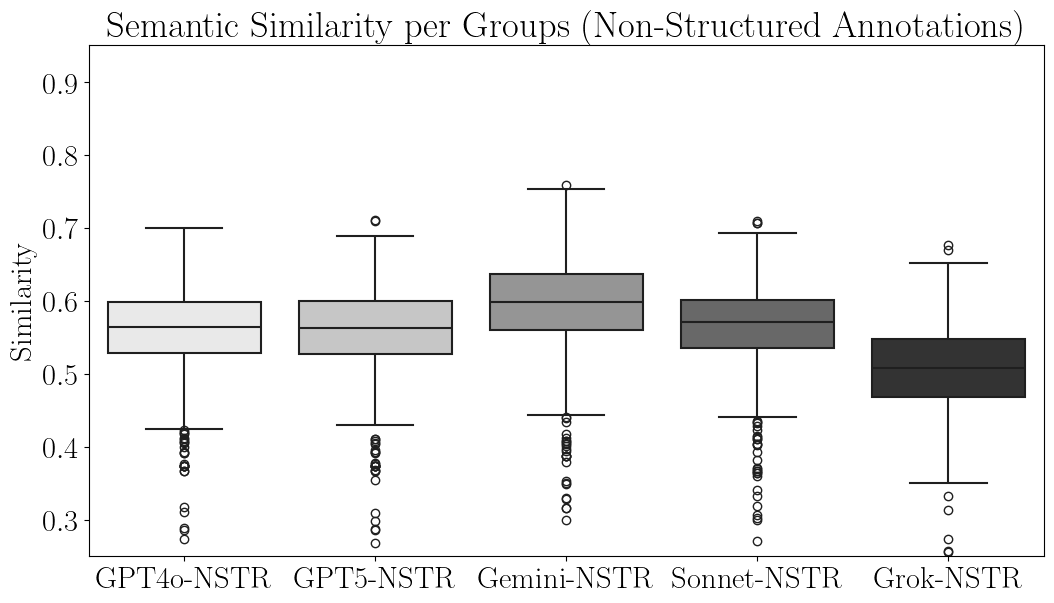

In [10]:
for i, df_similarity_result in enumerate(df_similarity_results.values(), 2):

    plt.figure(figsize=(11, 6.5))
    sns.boxplot(
        data=df_similarity_result, x="Group", y="Similarity",
        hue="Group", palette="Greys", linewidth=1.5, legend=False
    )

    # Add plot labels.
    title = "Semantic Similarity per Groups (Structured Annotations)" \
        if i == 0 else "Semantic Similarity per Groups (Non-Structured Annotations)"
    plt.title(title)
    #plt.xticks(rotation=25)
    plt.xlabel(None)
    plt.ylim(0.25, 0.95)
    plt.tight_layout()

    # Save the plot as a PGF file.
    plt.savefig(f"pgf/f{i}_semantic_similarity_box_plot.pgf")

## Gesture Recognition Accuracy Assessment in Unified Communication Platforms

This section transitions from semantic similarity analysis to practical recognition performance evaluation, examining how effectively different annotation methodologies enable accurate gesture-to-command mapping in real-world unified communication platform contexts.

### Analytical Scope and Objectives

**Performance Evaluation Framework**  
The recognition accuracy analysis addresses the fundamental question of annotation utility: how well do textual descriptions generated by different methodologies support accurate gesture command identification? This evaluation bridges the gap between semantic quality and practical application effectiveness.

**Contextual Relevance**  
Recognition accuracy assessment considers the specific requirements of unified communication platform interaction, where precise gesture-command mapping is essential for user experience and system reliability.

### Research Questions

This evaluation phase investigates:

1. **Annotation Source Impact**: How does the generation methodology (human vs. AI) influence recognition accuracy across gesture types?

2. **Structural Protocol Effects**: What role do structured annotation protocols play in supporting accurate gesture recognition compared to unstructured approaches?

3. **Cross-Gesture Variability**: Do certain gesture types exhibit greater sensitivity to annotation quality differences than others?

### Methodological Transition

The shift from semantic similarity to recognition accuracy analysis represents a progression from linguistic evaluation to functional assessment, providing complementary perspectives on annotation effectiveness. While semantic similarity measures descriptive quality, recognition accuracy quantifies practical utility in automated gesture recognition systems.

In [11]:
# Create a dictionary of datasets.
datasets = {
    group: pd.read_csv(
        f"./data/predictions/{group.value}_predictions.csv"
    ) for group in Group
}

# Load the ground truth dataset.
df_ground_truth = pd.read_csv(
    f"./dataset/ground_truth_commands.csv"
)

## Recognition Accuracy Computation: Gesture-Command Mapping Performance

This section implements a comprehensive accuracy evaluation framework that systematically assesses gesture recognition performance across annotation groups and individual gesture types. The analysis provides granular insights into the practical effectiveness of different annotation methodologies.

### Computational Methodology

**Data Integration Protocol**  
The accuracy assessment requires careful integration of prediction datasets with ground truth reference standards:
1. **Prediction Dataset Import**: Systematically loads prediction files for each annotation group
2. **Ground Truth Alignment**: Ensures proper matching between predicted and actual gesture commands
3. **Data Structure Harmonization**: Standardizes prediction and reference formats for consistent analysis

**Cross-Validation Framework**  
Sample size normalization ensures balanced evaluation across all experimental conditions, preventing bias introduced by varying dataset dimensions.

### Gesture-Specific Analysis

**Individual Gesture Evaluation**  
Recognition accuracy is computed separately for each of the eight gesture commands, enabling identification of:
- **Gesture-Specific Performance Patterns**: Commands that exhibit consistently high or low recognition rates
- **Annotation Sensitivity**: Gestures that show greater variability across annotation methodologies  
- **Systematic Recognition Challenges**: Commands that prove difficult regardless of annotation source

**Methodological Rigor**  
String normalization (lowercase conversion and whitespace removal) ensures robust comparison between predicted and ground truth labels, eliminating spurious differences due to formatting variations.

### Statistical Output Generation

**Performance Metrics Computation**  
For each combination of annotation group and gesture type, the following metrics are calculated:
- **Recognition Accuracy**: Proportion of correct predictions relative to total attempts
- **Correct Predictions**: Absolute count of successful gesture-command mappings
- **Classification Errors**: Absolute count of incorrect gesture identifications

**Data Structure Organization**  
Results are systematically organized in a structured DataFrame format enabling:
- **Cross-Group Comparison**: Direct assessment of annotation methodology effects
- **Gesture-Specific Analysis**: Detailed examination of command-level performance patterns
- **Statistical Modeling Preparation**: Properly formatted data for subsequent hypothesis testing

This computational framework provides the quantitative foundation for evaluating the practical utility of different annotation approaches in supporting accurate gesture recognition within unified communication platform contexts.

In [12]:
# Initialize the accuracy results.
accuracy_results = {
    Group.HUMAN_STRUCTURED: [],
    Group.HUMAN_NON_STRUCTURED: []
}

# Calculate recognition accuracy for each gesture and group.
for group, dataset in datasets.items():

    # Create a DataFrame with a sample of predictions and ground truth.
    predictions = dataset.melt(
        id_vars="id_video", var_name="Gesture", value_name="Prediction"
    )

    size = dataset.shape[0]
    ground_truth = df_ground_truth.iloc[:size].melt(
        id_vars="id_video", var_name="Gesture", value_name="GroundTruth"
    )

    # Extract hand gesture commands.
    indexes = predictions.Prediction.notna()
    predictions = predictions[indexes]
    ground_truth = ground_truth[indexes]

    # Iterate over the gestures.
    for gesture in Gesture:

        # Filter data for the current gesture.
        prediction_data = predictions[
            predictions.Gesture == gesture.value]
        ground_truth_data = ground_truth[
            ground_truth.Gesture == gesture.value]

        # Calculate accuracy.
        accuracy, correct, incorrect = calculate_accuracy(
            prediction_data.Prediction.str.lower().str.strip(),
            ground_truth_data.GroundTruth.str.lower().str.strip()
        )

        # Save the results.
        group_key = Group.HUMAN_NON_STRUCTURED \
            if group.name.endswith("NON_STRUCTURED") else \
                Group.HUMAN_STRUCTURED

        accuracy_results[group_key].append({
            "Group": group,
            "Gesture": gesture.name,
            "Accuracy": accuracy,
            "Correct": correct,
            "Incorrect": incorrect
        })

# Convert results to a DataFrame for analysis.
df_accuracy_results = {
    Group.HUMAN_STRUCTURED: \
        pd.DataFrame(accuracy_results[Group.HUMAN_STRUCTURED]),
    Group.HUMAN_NON_STRUCTURED: \
        pd.DataFrame(accuracy_results[Group.HUMAN_NON_STRUCTURED])
}

## Statistical Analysis of Recognition Performance: Hypothesis Testing Framework

This section employs rigorous statistical methodology to evaluate recognition accuracy differences across annotation groups and gesture types. The analysis combines omnibus testing with detailed pairwise comparisons to provide comprehensive evidence regarding annotation methodology effectiveness.

### Statistical Testing Strategy

**Two-Tier Hypothesis Testing Approach**  
The analysis implements a hierarchical testing framework:
1. **Omnibus Tests**: Chi-square tests assess overall differences in accuracy distributions across groups
2. **Pairwise Comparisons**: Proportions Z-tests identify specific group pairs exhibiting significant performance differences

### Chi-Square Analysis

**Methodological Framework**  
For each gesture type, contingency table analysis evaluates the null hypothesis of independence between annotation group and recognition success:

**Hypothesis Formulation**
- **H₀**: Recognition accuracy is independent of annotation methodology
- **H₁**: Recognition accuracy varies significantly across annotation groups

**Test Statistics**  
- **Chi-square Statistic (χ²)**: Measures deviation from expected frequencies under independence assumption
- **P-value**: Probability of observing test statistic under null hypothesis
- **Effect Size Assessment**: Quantifies practical significance of observed differences

### Pairwise Proportions Testing

**Detailed Comparative Analysis**  
Proportions Z-tests evaluate specific hypotheses about accuracy differences between annotation group pairs:

**Statistical Model**  
For groups i and j, the test evaluates whether recognition success proportions (π₍ᵢ₎ and π₍ⱼ₎) differ significantly:
- **H₀**: π₍ᵢ₎ = π₍ⱼ₎ (equal recognition rates)
- **H₁**: π₍ᵢ₎ ≠ π₍ⱼ₎ (different recognition rates)

**Test Implementation**
- **Z-statistic Calculation**: Standardized difference between sample proportions
- **Significance Assessment**: Two-tailed hypothesis testing with appropriate critical values

### Multiple Testing Correction

**Family-Wise Error Rate Control**  
Bonferroni correction addresses the multiple comparison problem inherent in pairwise testing:
- **Adjustment Procedure**: αₐdⱼᵤₛₜₑd = α/m, where m represents the number of comparisons
- **Conservative Approach**: Maintains overall Type I error rate at specified significance level
- **Statistical Rigor**: Ensures reliable identification of genuine group differences

### Result Documentation and Export

**Comprehensive Output Organization**  
Statistical results are systematically documented across multiple formats:
- **Chi-square Results**: Overall significance tests with effect sizes
- **Pairwise Comparisons**: Detailed Z-test results with corrected p-values
- **Group Identification**: Human-readable labels for interpretation and presentation

**Export Protocol**  
Results are exported in structured CSV format for:
- **Manuscript Integration**: Direct incorporation into scientific publication workflows
- **Reproducible Research**: Transparent documentation of analytical procedures
- **Further Analysis**: Foundation for additional statistical modeling or meta-analysis

This statistical framework provides robust evidence regarding the comparative effectiveness of different annotation methodologies in supporting accurate gesture recognition, enabling evidence-based conclusions about optimal annotation practices for unified communication platform applications.

In [13]:
# Initialize the final accuracy and pairwise results.
df_pairwise_results = {
    Group.HUMAN_STRUCTURED: [],
    Group.HUMAN_NON_STRUCTURED: []
}

df_final_accuracy_results = {
    Group.HUMAN_STRUCTURED: [],
    Group.HUMAN_NON_STRUCTURED: []
}

for k, group in enumerate(df_accuracy_results):

    # Initialize statistical results.
    chi_square_results = []
    pairwise_results = []

    # Filter the groups for the current iteration.
    import math
    groups = list(Group)[k * 6:k * 6 + math.ceil(len(Group) / 2)]

    for gesture in Gesture:

        # Initialize observed data.
        observed_data = np.array(
            df_accuracy_results[group][
                df_accuracy_results[group].Gesture == gesture.name
            ][["Correct", "Incorrect"]].values.tolist()
        )

        # Perform Chi-Square Test.
        chi2, p_value, _, _ = chi2_contingency(observed_data, correction=False)

        # Store overall test results.
        chi_square_results.append({
            "Gesture": gesture.name,
            "Chi2": chi2,
            "p-value": p_value
        })

        # Pairwise comparisons using Proportions Z-Test.
        for i, group1 in enumerate(groups):
            for j, group2 in enumerate(groups):
                if i >= j:
                    continue

                # Extract observed data for the groups.
                count = np.array([
                    observed_data[i][0], observed_data[j][0]
                ])
                nobs = np.array([
                    observed_data[i].sum(), observed_data[j].sum()
                ])

                # Perform the test only if there are correct predictions.
                if count.max() > 0:
                    zstat, p_value = proportions_ztest(count, nobs)
                    pairwise_results.append({
                        "Gesture": gesture.name,
                        "Group1": group1.name,
                        "Group2": group2.name,
                        "Z-Stat": zstat,
                        "p-value": p_value
                    })

    # Adjust p-values for multiple comparisons.
    pairwise_p_values = [ result["p-value"] for result in pairwise_results ]
    _, corrected_p_values, _, _ = multipletests(
        pairwise_p_values, method="bonferroni")

    for result, corrected_p_value in zip(pairwise_results, corrected_p_values):
        result["Corrected p-value"] = corrected_p_value

    # Convert results to DataFrames.
    df_chi_square_results = pd.DataFrame(chi_square_results)
    df_pairwise_results[group] = pd.DataFrame(pairwise_results)

    # Rename the DataSets for better readability.
    df_final_accuracy_results[group] = df_accuracy_results[group].copy()
    for df in [
        df_final_accuracy_results[group],
        df_chi_square_results,
        df_pairwise_results[group]
    ]:
        df.Gesture = df.Gesture.map({
            gesture.name: GESTURES_MAP[gesture] for gesture in Gesture
        })

    df_final_accuracy_results[group].Group = \
        df_final_accuracy_results[group].Group.map({
            g: GROUPS_MAP[g] for g in groups
        })

    for column in df_pairwise_results[group].columns[1:3]:
        df_pairwise_results[group][column] = \
            df_pairwise_results[group][column].map({
                g.name: GROUPS_MAP[g] for g in groups
            })

    # Save the accuracy results statistics.
    df_final_accuracy_results[group].to_csv(
        f"outputs/r{6 + (k * 3)}_accuracy_results.csv", index=False)
    df_chi_square_results.to_csv(
        f"outputs/r{6 + (k * 3) + 1}_chi_square_results.csv", index=False)
    df_pairwise_results[group].to_csv(
        f"outputs/r{6 + (k * 3) + 2}_pairwise_results.csv", index=False)

## Synthesis of Significant Performance Differences: Recognition Accuracy Patterns

This section consolidates and synthesizes the results of statistical hypothesis testing to identify systematic patterns in recognition performance differences across gesture types and annotation methodologies. The analysis distills complex statistical outputs into interpretable findings regarding annotation effectiveness.

### Significance Filtering and Identification

**Statistical Significance Threshold**  
Following Bonferroni correction for multiple comparisons, pairwise tests with adjusted p-values below α = 0.05 are classified as statistically significant, indicating reliable evidence of performance differences between annotation methodologies.

**Result Consolidation**  
Significant comparisons are systematically filtered and organized to facilitate pattern identification and interpretation of systematic effects across experimental conditions.

### Gesture-Level Performance Analysis

**Differential Sensitivity Assessment**  
The analysis quantifies how different gesture types respond to annotation methodology variations:
- **High-Sensitivity Gestures**: Commands showing numerous significant pairwise differences, indicating strong dependence on annotation quality
- **Robust Gestures**: Commands with few significant differences, suggesting consistent recognition regardless of annotation source
- **Performance Gradients**: Systematic ordering of gesture difficulty across annotation methodologies

**Cross-Methodological Patterns**  
Summary statistics reveal which gesture types exhibit the greatest variability in recognition performance, providing insights into:
- **Annotation Dependencies**: Gestures that benefit most from structured annotation protocols
- **Methodological Robustness**: Commands that maintain consistent recognition across diverse annotation approaches
- **Quality Thresholds**: Critical annotation characteristics that enable reliable gesture recognition

### Comprehensive Performance Profiling

**Quantitative Summary Generation**  
A structured summary table presents the total number of significant pairwise comparisons for each gesture, providing:
- **Relative Ranking**: Gestures ordered by sensitivity to annotation methodology
- **Effect Magnitude**: Quantitative assessment of annotation impact on recognition performance
- **Systematic Patterns**: Identification of gesture characteristics associated with annotation sensitivity

**Missing Data Integration**  
Gestures without significant pairwise differences are explicitly included with zero counts, ensuring comprehensive coverage of all experimental conditions and preventing interpretation bias.

### Interpretive Framework

**Evidence Synthesis**  
The consolidation process transforms statistical test results into actionable insights regarding:
- **Optimal Annotation Strategies**: Methodologies that consistently support high recognition accuracy
- **Context-Dependent Effects**: Gesture-specific patterns in annotation effectiveness
- **Quality Assurance Implications**: Identification of critical factors for reliable gesture recognition systems

This synthesis provides the empirical foundation for evidence-based recommendations regarding annotation methodology selection and optimization in unified communication platform applications.

In [14]:
# Initialize the pairwise summary results.
df_pairwise_summaries = {
    Group.HUMAN_STRUCTURED: [],
    Group.HUMAN_NON_STRUCTURED: []
}

for i, (group, df_pairwise_result) in enumerate(df_pairwise_results.items()):

    # Filter for significant comparisons.
    df_significant_pairwise_results = df_pairwise_result[
        df_pairwise_result["Corrected p-value"] < 0.05
    ]

    # Group by gesture, count significant comparisons.
    df_pairwise_summary = df_significant_pairwise_results.groupby(
        ["Gesture"]
    ).size().reset_index(name="Total")

    # Add missing gestures from GESTURES_MAP with Total as 0.
    missing_gestures = \
        set(GESTURES_MAP.values()) - set(df_pairwise_summary["Gesture"])
    for gesture in missing_gestures:
        df_pairwise_summary = pd.concat([
            df_pairwise_summary, pd.DataFrame({
                "Gesture": [gesture],
                "Total": [0]
            })
        ], ignore_index=True)

    # Reorder the rows of pivot_summary by gestures_names.
    df_pairwise_summary = df_pairwise_summary.set_index("Gesture").reindex(
        GESTURES_MAP.values(), fill_value=0
    ).reset_index()
    df_pairwise_summaries[group] = df_pairwise_summary

    print("Significant Pairwise Comparisons:")
    print(df_significant_pairwise_results)

    # Print the results.
    print("Significant Pairwise Comparisons Summary:")
    print(df_pairwise_summary)

    # Save significant accuracy pairwise results.
    df_significant_pairwise_results.to_csv(
        f"outputs/r{12 + (i * 2)}_significant_pairwise_results.csv", index=False)
    df_pairwise_summary.to_csv(
        f"outputs/r{12 + (i * 2) + 1}_pairwise_summary.csv", index=False)

Significant Pairwise Comparisons:
                Gesture      Group1      Group2     Z-Stat       p-value  \
0       Increase volume   Human-STR   GPT4o-STR   6.801672  1.034121e-11   
1       Increase volume   Human-STR    GPT5-STR   8.760785  1.938951e-18   
2       Increase volume   Human-STR  Gemini-STR   9.762468  1.631365e-22   
3       Increase volume   Human-STR  Sonnet-STR   7.663000  1.816387e-14   
4       Increase volume   Human-STR    Grok-STR  10.049475  9.235807e-24   
8       Increase volume   GPT4o-STR    Grok-STR   4.001109  6.304640e-05   
15      Decrease volume   Human-STR   GPT4o-STR  10.843234  2.147441e-27   
16      Decrease volume   Human-STR    GPT5-STR  10.503934  8.285366e-26   
17      Decrease volume   Human-STR  Gemini-STR   9.061207  1.290148e-19   
18      Decrease volume   Human-STR  Sonnet-STR  12.033544  2.367738e-33   
19      Decrease volume   Human-STR    Grok-STR  12.618781  1.663760e-36   
27      Decrease volume  Gemini-STR  Sonnet-STR   4.11

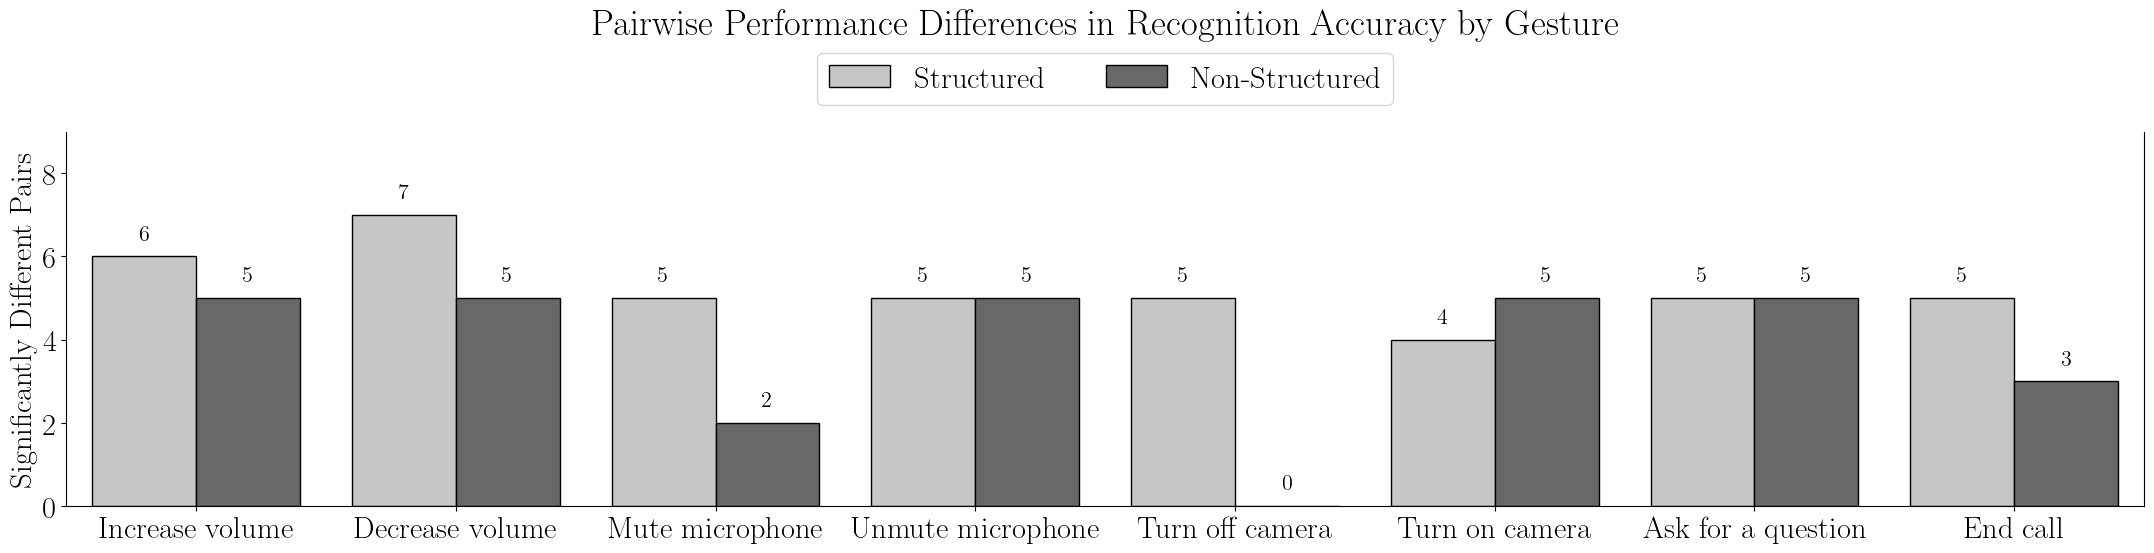

In [15]:
# Create separate DataFrames for structured and non-structured groups.
df_structured = df_pairwise_summaries[Group.HUMAN_STRUCTURED]
df_non_structured = df_pairwise_summaries[Group.HUMAN_NON_STRUCTURED]

# Add a column to indicate the group.
df_structured["Group"] = "Structured"
df_non_structured["Group"] = "Non-Structured"

# Merge the pairwise summary results.
df_pairwise_results = pd.concat(
    [df_structured, df_non_structured], ignore_index=True)

# Plot the pairwise results.
plt.figure(figsize=(22, 6))

# Create the bar plot with the accuracy results.
ax = sns.barplot(
    x="Gesture", y="Total", hue="Group",
    data=df_pairwise_results,
    palette="Greys", edgecolor="black", dodge=True
)

# Remove the top spine.
ax.spines["top"].set_visible(False)

# Add labels to the top of each bar.
for j, bar in enumerate(ax.patches):

    # Skip the set of bars from the legend.
    if j == len(ax.patches) - len(set(df_pairwise_results.Group)):
        break

    height = int(bar.get_height())
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 0.3,
        f"{height}", ha="center", va="bottom",
        fontsize=16
    )

# Add plot labels.
title = "Pairwise Performance Differences in Recognition Accuracy by Gesture"
ax.set_title(title, pad=70)
plt.ylabel("Significantly Different Pairs")
plt.ylim(0, df_pairwise_results.Total.max() + 2)
plt.yticks(np.arange(0, df_pairwise_results.Total.max() + 2, 2))
plt.xlabel(None)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=7)
plt.tight_layout()

# Save the plot as a PGF file.
plt.savefig("pgf/f4_df_pairwise_summary.pgf")

## Comparative Analysis: Structured vs. Non-Structured Annotation Performance Patterns

This section consolidates the pairwise comparison results from both structured and non-structured annotation conditions to enable direct comparison of performance variability patterns across methodological paradigms. The analysis examines how annotation structure influences the consistency of recognition accuracy across different gesture types.

### Methodological Integration

**Cross-Paradigm Data Consolidation**  
The analysis integrates significant pairwise comparison counts from both annotation methodologies:
- **Structured Annotations**: Results from systematic, protocol-guided annotation procedures
- **Non-Structured Annotations**: Results from naturalistic, unconstrained annotation approaches

**Comparative Framework Construction**  
By merging the pairwise summary data from both conditions, the analysis enables direct assessment of how annotation structure affects performance consistency across gesture types.

### Visualization Methodology

**Comparative Bar Chart Design**  
The grouped bar visualization employs the following design principles:
- **Primary Grouping**: Gesture types arranged along the x-axis for direct comparison
- **Secondary Grouping**: Annotation structure (structured vs. non-structured) distinguished through contrasting visual encoding
- **Quantitative Encoding**: Bar height represents the number of statistically significant pairwise differences for each gesture-structure combination

**Statistical Interpretation Framework**  
- **High Bar Values**: Indicate gestures with substantial performance variability across annotation groups, suggesting strong sensitivity to annotation methodology
- **Low Bar Values**: Represent gestures with consistent recognition performance, indicating robustness to annotation approach variations
- **Cross-Structure Comparison**: Reveals whether structured protocols reduce performance variability compared to naturalistic annotation approaches

### Analytical Insights

**Performance Stability Assessment**  
This comparative visualization addresses key research questions:
1. **Protocol Impact**: Do structured annotation protocols result in more consistent recognition performance across different AI models?
2. **Gesture-Specific Sensitivity**: Which gestures exhibit the greatest susceptibility to annotation methodology variations?
3. **Methodological Robustness**: How does annotation structure influence the overall reliability of gesture recognition systems?

The resulting visualization provides empirical evidence for evaluating the trade-offs between annotation protocol complexity and recognition performance consistency, informing evidence-based decisions about optimal annotation practices for gesture recognition applications.## Comprehensive Visualization: Gesture Recognition Accuracy Performance Matrix

This section presents a publication-quality visualization that systematically displays recognition accuracy across all combinations of gesture types and annotation methodologies. The multi-dimensional bar chart facilitates comprehensive comparison and pattern identification across experimental conditions.

### Visualization Design Methodology

**Multi-Factorial Display Strategy**  
The grouped bar chart employs a sophisticated design approach to present complex multidimensional data:
- **Primary Grouping**: Gesture types organized along the x-axis for direct command comparison
- **Secondary Grouping**: Annotation methodologies distinguished through grayscale color coding
- **Quantitative Encoding**: Bar height represents recognition accuracy values (0-1 scale)
- **Precision Display**: Numerical labels on each bar provide exact accuracy values

**Visual Hierarchy and Clarity**  
- **Monochromatic Palette**: Grayscale color scheme ensures accessibility and print compatibility
- **Border Definition**: Black edge lines enhance bar separation and visual clarity
- **Label Integration**: Rotated precision values minimize visual clutter while maximizing information density
- **Dodged Arrangement**: Systematic bar positioning prevents overlap and facilitates direct comparison

### Statistical Information Integration

**Comprehensive Performance Display**  
Each bar represents the mean recognition accuracy for a specific gesture-annotation combination, enabling:
- **Cross-Gesture Comparison**: Identification of commands with consistently high or low recognition rates
- **Cross-Methodology Assessment**: Evaluation of annotation approaches across different gesture types
- **Interaction Pattern Recognition**: Detection of gesture-specific annotation effectiveness

**Precision and Transparency**  
Numerical labels (formatted to two decimal places) ensure:
- **Exact Value Communication**: Precise quantitative information for detailed analysis
- **Verification Capability**: Readers can verify visual impressions with exact numerical data
- **Publication Standards**: High-resolution numerical reporting appropriate for peer review

### Layout Optimization and Professional Standards

**Space Efficiency and Readability**  
- **Expanded Figure Dimensions**: Adequate spacing prevents visual crowding in complex multi-group displays
- **Legend Positioning**: Strategic placement above the plot area maximizes data visibility
- **Axis Optimization**: Y-axis scaling and tick marks facilitate accurate value reading
- **Typography**: LaTeX-rendered text ensures mathematical notation consistency

**Export Specifications**  
Publication-ready output in PGF format ensures:
- **Vector Graphics Quality**: Scalable visualization maintaining clarity at all resolutions
- **LaTeX Integration**: Seamless incorporation into manuscript preparation workflows
- **Professional Typography**: Consistent font rendering matching academic publication standards

This comprehensive visualization serves as the primary empirical evidence display for recognition accuracy findings, supporting detailed interpretation of annotation methodology effectiveness across diverse gesture recognition contexts.

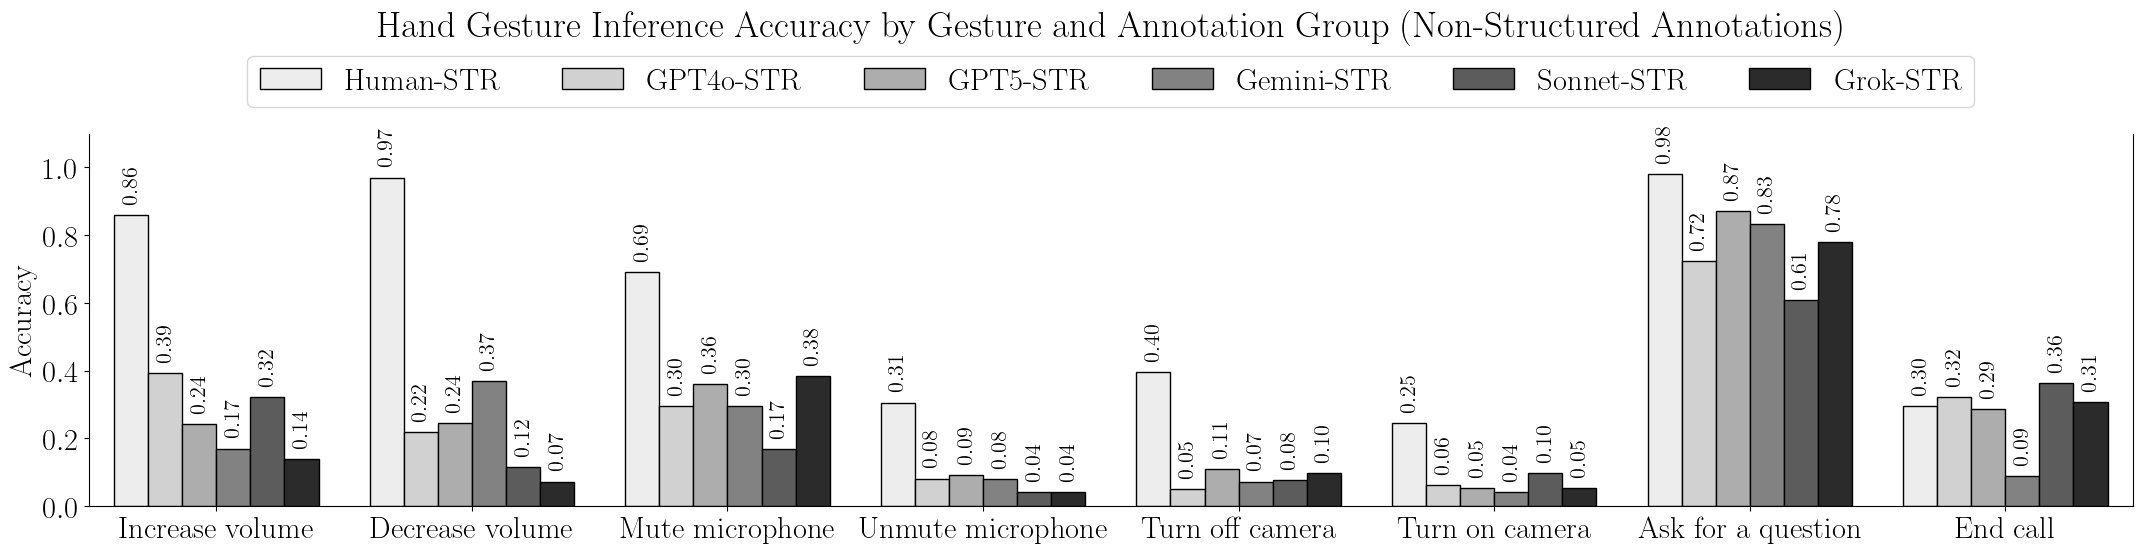

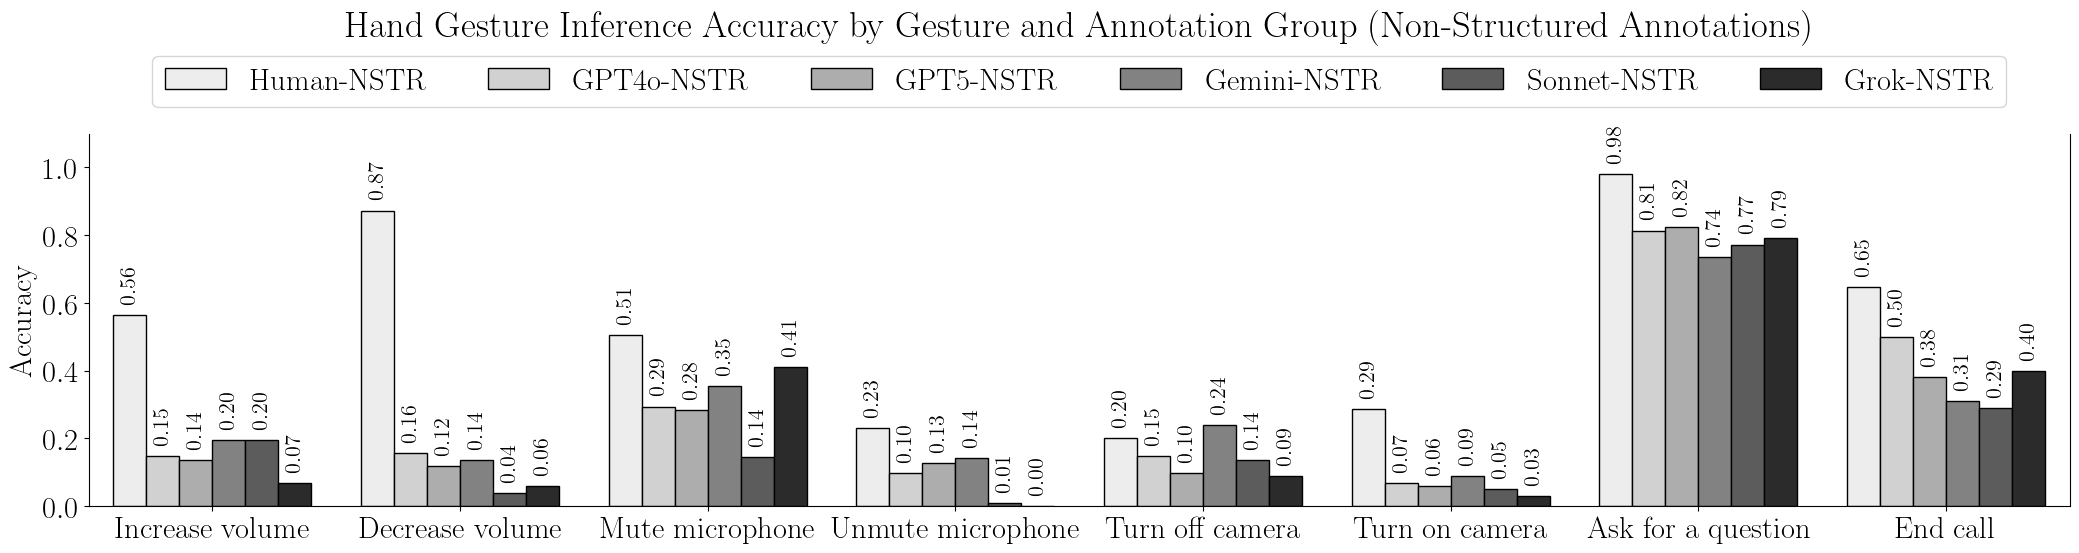

In [16]:
for i, df_accuracy_result in enumerate(df_final_accuracy_results.values(), 5):

    plt.figure(figsize=(22, 6))

    # Create the bar plot with the accuracy results.
    ax = sns.barplot(
        x="Gesture", y="Accuracy", hue="Group",
        data=df_accuracy_result,
        palette="Greys", edgecolor="black", dodge=True
    )

    # Remove the top spine.
    ax.spines["top"].set_visible(False)

    # Add labels to the top of each bar.
    for j, bar in enumerate(ax.patches):

        # Skip the set of bars from the legend.
        if j == len(ax.patches) - len(set(df_accuracy_result.Group)):
            break

        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.03,
            f"{height:.2f}", ha="center", va="bottom",
            fontsize=16, rotation=90
        )

    # Add plot labels.
    title = "Hand Gesture Inference Accuracy by Gesture and Annotation Group (Structured Annotations)" if i == 0 else "Hand Gesture Inference Accuracy by Gesture and Annotation Group (Non-Structured Annotations)"
    ax.set_title(title, pad=70)
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)
    plt.yticks(np.arange(0.0, 1.1, 0.2))
    plt.xlabel(None)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=7)
    plt.tight_layout()

    # Save the plot as a PGF file.
    plt.savefig(f"pgf/f{i}_hand_gesture_accuracy_bar_plot.pgf")